In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('precision', 4)
np.set_printoptions(precision = 3)

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-paper')

## 목차
1. Read the Dataset (after extracting)
2. Preprocessing
3. EDA
4. Modeling
5. Evaluation

## Read the Dataset
- 데이터셋: 유저별(iduser) 문서 사용행동에 대한 횟수와 그룹 특성(group)를 처리한 데이터
    - 3개의 테이블 소스에서 Raw 데이터를 가공: ''' groupby("iduser").agg(count,,,sum,,,etc)''' 이후에 조인함
    - 결제 타이밍 기준(유저마다 다름)으로 이전 30일의 행동 기준으로 데이터 추출
- 간혹 csv를 불러올 때 unnamed 라는 컬럼이 자동 생성되므로, index_col=0 이라는 명령어를 통해 처리

In [8]:
df = pd.read_csv('songhunhwa.github.com/tutorial/tutorial_03/testset.csv', index_col = 0)

In [10]:
df.head()

,iduser,mdutype,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,...,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
0,10100018739106,NaN,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
1,10100037810674,NaN,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,...,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
2,10100036273719,NaN,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
3,10100027752244,NaN,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,...,NaN,NaN,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
4,10100000624840,NaN,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.tail()

,iduser,mdutype,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,...,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
199995,10100014533282,NaN,sdu,37.0,0.0,2.0,0.0,0.0,25.0,0.0,...,0.0,0.0,14.0,37.0,7.0,0.0,1.3064e+07,1922364.0,0.0,1.4987e+07
199996,10100037382422,a2p,mdu,6.0,0.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,18.0,6.0,0.0,0.0,1.5937e+07,0.0,0.0,1.5937e+07
199997,10100024157271,NaN,sdu,32.0,0.0,0.0,0.0,0.0,28.0,0.0,...,0.0,0.0,18.0,32.0,0.0,0.0,7.3059e+06,0.0,0.0,7.3059e+06
199998,10100022150627,NaN,sdu,18.0,0.0,0.0,0.0,0.0,20.0,0.0,...,0.0,0.0,9.0,18.0,0.0,0.0,5.3352e+07,0.0,0.0,5.3352e+07
199999,10100021804275,NaN,sdu,3.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,3.0,3.0,0.0,0.0,9.5232e+04,0.0,0.0,9.5232e+04


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   iduser         200000 non-null  int64  
 1   mdutype        9328 non-null    object 
 2   group          200000 non-null  object 
 3   viewCount      165369 non-null  float64
 4   editCount      165369 non-null  float64
 5   shareCount     165369 non-null  float64
 6   searchCount    165369 non-null  float64
 7   coworkCount    165369 non-null  float64
 8   add            63166 non-null   float64
 9   del            63166 non-null   float64
 10  move           63166 non-null   float64
 11  rename         63166 non-null   float64
 12  adddir         63166 non-null   float64
 13  movedir        63166 non-null   float64
 14  visdays        184306 non-null  float64
 15  openCount      149090 non-null  float64
 16  saveCount      149090 non-null  float64
 17  exportCount    149090 non-nul

In [13]:
df.shape

(200000, 22)

### Column Info.
- ✭iduser: 식별값
- mdutype: 중요x
- ✭✭group: y, 결제(mdu) vs 비결제(sdu) 정보
- ✭viewCount: 보기 횟수
- ✭editCount: 편집 횟수
- ✭shareCount: 공유 횟수
- ✭searchCount: 검색 횟수
- ✭coworkCount: 공동작업 횟수
- add: 파일 추가 횟수
- del: 파일 삭제 횟수
- move: 파일 이동 횟수
- rename: 파일명 변경 횟수
- adddir: 폴더 생성
- movedir: 폴더 이동
- ✭✭visdays: 방문일수
- ✭openCount: 열기 횟수
- ✭saveCount: 저장 횟수
- ✭exportCount: 내보내기 횟수
- viewTraffic: 보기 용량(파일 사이즈)
- editTraffic: 편집 용량
- exportTraffic: 내보내기 용량
- traffic: 전체 용량

### Pandas DF index 지정
- 유저 id와 같은 유니크 값(primary key)를 인덱스로 지정를 인덱스로 지정하는 것이 편리함(pandas 장점)
- 그렇지 않으면, 추후 scaling이나 모델 학습등을 할 때 매번 slicing으로 처리해야 함

In [17]:
df.set_index('iduser', inplace = True)

In [18]:
df.head()

,mdutype,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,...,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,,
10100018739106,NaN,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,NaN,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,...,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,NaN,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,NaN,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100000624840,NaN,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.drop('mdutype', axis = 1, inplace = True)

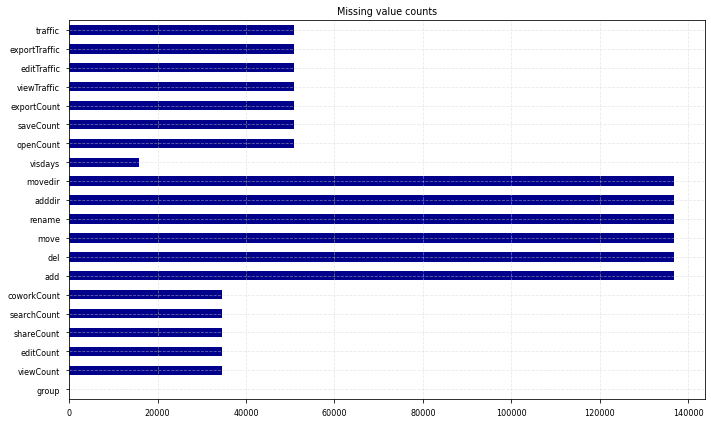

In [20]:
# check missing vavlues in each cols
df.isnull().sum().plot(kind = 'barh', color = 'darkblue', figsize = (10, 6))

plt.title("Missing value counts")
plt.grid(color = 'lightgrey', alpha = 0.5, linestyle = '--')
plt.tight_layout()

### 결측치 처리
- 추후에는 협의를 통해 결측치 발생 이유 파악 및 예방에 노력을 기울이는 것이 필요
- 결측치 처리 방법
    - 가장 쉬운 방법은 Null이 포함된 행을 모두 제거하는 것이다
    - 사례(observation)가 많다면 이 방법을 사용하는 것이 가능하다
    - 평균, 중앙치, 최빈치, 간단한 예측 모델 활용을 통해 imputation
    - 만약 샘플수가 충분하지 않을 경우 pandas의 fillna() 명령어로 Null값을 채우는 것이 가능하다
    - 연속형인 경우 Mean이나 Median을 이용하고 명목형인 경우 Mode(최빈치)나 classification 모델을 통해 Null값을 대체할 수 있다
    
``` python
#Null 값을 median, mean으로 대체하는 코드 예제 예제
df.fillna(df.med())
df.fillna(df.mean())

# Scikit-learn imputation을 통해 명목변수의 Null 값을 Mode로 대체한 예제
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN', strategy = 'most_frequent', axis = 0)
df['X'] = imp.fit_transform(df['X'])
```

In [21]:
# 우선 group column이 Null인 경우만 선택
df[df['group'].isnull()==True].head()

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,


In [22]:
# visdays column이 Null인 경우만 선택
df[df['visdays'].isnull()==True].head()

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100022918449,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100009612042,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100017397956,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100030949780,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100021285047,sdu,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,5680128.0,0.0,0.0,5680128.0


In [23]:
# 특정 column을 기준으로 drop
df1 = df.dropna(subset = ['visdays'])

In [24]:
df1.head()

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100000624840,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df1.isnull().sum()

group                 0
viewCount         22534
editCount         22534
shareCount        22534
searchCount       22534
coworkCount       22534
add              121225
del              121225
move             121225
rename           121225
adddir           121225
movedir          121225
visdays               0
openCount         38403
saveCount         38403
exportCount       38403
viewTraffic       38403
editTraffic       38403
exportTraffic     38403
traffic           38403
dtype: int64

#### Q) visidays, group 을 제외한 나머지 항목이 nan이면 drop 해볼까요?

In [78]:
[x for x in df.columns if x not in ['group','visdays']]

['viewCount',
 'editCount',
 'shareCount',
 'searchCount',
 'coworkCount',
 'add',
 'del',
 'move',
 'rename',
 'adddir',
 'movedir',
 'openCount',
 'saveCount',
 'exportCount',
 'viewTraffic',
 'editTraffic',
 'exportTraffic',
 'traffic']

In [79]:
df2 = df.dropna(subset = [x for x in df.columns if x not in ['group','visdays']], how = 'all')

In [80]:
df2.head()

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100006151000,sdu,33.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,18.0,33.0,0.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06


In [81]:
df2.isnull().sum()

group                 0
viewCount          1621
editCount          1621
shareCount         1621
searchCount        1621
coworkCount        1621
add              103824
del              103824
move             103824
rename           103824
adddir           103824
movedir          103824
visdays            3638
openCount         17900
saveCount         17900
exportCount       17900
viewTraffic       17900
editTraffic       17900
exportTraffic     17900
traffic           17900
dtype: int64

In [82]:
df2[df2['viewCount'].isnull() == True][:10]

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100028912459,sdu,NaN,NaN,NaN,NaN,NaN,22.0,0.0,0.0,0.0,2.0,0.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100022395852,sdu,NaN,NaN,NaN,NaN,NaN,13.0,0.0,0.0,0.0,0.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100024336048,sdu,NaN,NaN,NaN,NaN,NaN,11820.0,0.0,0.0,0.0,93.0,0.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100031442724,sdu,NaN,NaN,NaN,NaN,NaN,30.0,0.0,0.0,0.0,2.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100025492049,sdu,NaN,NaN,NaN,NaN,NaN,10.0,0.0,0.0,0.0,0.0,0.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100011427498,sdu,NaN,NaN,NaN,NaN,NaN,93.0,0.0,0.0,1.0,2.0,0.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100034928127,sdu,NaN,NaN,NaN,NaN,NaN,10.0,0.0,0.0,0.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100031389762,sdu,NaN,NaN,NaN,NaN,NaN,72.0,0.0,7.0,1.0,23.0,1.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100008244902,sdu,NaN,NaN,NaN,NaN,NaN,27.0,0.0,0.0,0.0,0.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df2[df2['add'].isnull() == True][:10]

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100036273719,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100039037854,sdu,4.0,0.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,4.0,0.0,0.0,1.9194e+05,0.0,0.0,1.9194e+05
10100038701419,mdu,27.0,34.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,26.0,27.0,35.0,0.0,4.2297e+06,208649.0,0.0,4.4383e+06
10100034746743,sdu,5.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,0.0,0.0,6.7553e+05,0.0,0.0,6.7553e+05
10100023986518,sdu,3.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,0.0,0.0,2.8803e+05,0.0,0.0,2.8803e+05
10100006498305,sdu,3.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,2.0,0.0,2.9094e+05,44032.0,0.0,3.3497e+05
10100038316936,mdu,13.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,28.0,13.0,0.0,0.0,6.0651e+07,0.0,0.0,6.0651e+07


In [84]:
df2[df2['openCount'].isnull() == True][:10]

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100026531335,sdu,18.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100036725270,sdu,50.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100019287454,sdu,9.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100029507725,sdu,39.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100012973812,sdu,10.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100034324468,sdu,40.0,13.0,1.0,0.0,0.0,15.0,0.0,0.0,0.0,1.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100036076757,sdu,11.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100032604810,sdu,12.0,9.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100027655619,sdu,13.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df2[df2['traffic'].isnull() == True][:10]

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100026531335,sdu,18.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100036725270,sdu,50.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100019287454,sdu,9.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100029507725,sdu,39.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100012973812,sdu,10.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100034324468,sdu,40.0,13.0,1.0,0.0,0.0,15.0,0.0,0.0,0.0,1.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100036076757,sdu,11.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100032604810,sdu,12.0,9.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100027655619,sdu,13.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### add, del~movedir 까지는 파일 management 관련 변수이므로 장대적으로 중요도 낮음
- 변수 삭제를 고려해볼 수 있으나 우선은 하지 않는다
- 우선 메꾸고 추후 제거도 고려 가능

In [88]:
# zero로 imputation
df2 = df2.fillna(0)

In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166990 entries, 10100018739106 to 10100021804275
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   group          166990 non-null  object 
 1   viewCount      166990 non-null  float64
 2   editCount      166990 non-null  float64
 3   shareCount     166990 non-null  float64
 4   searchCount    166990 non-null  float64
 5   coworkCount    166990 non-null  float64
 6   add            166990 non-null  float64
 7   del            166990 non-null  float64
 8   move           166990 non-null  float64
 9   rename         166990 non-null  float64
 10  adddir         166990 non-null  float64
 11  movedir        166990 non-null  float64
 12  visdays        166990 non-null  float64
 13  openCount      166990 non-null  float64
 14  saveCount      166990 non-null  float64
 15  exportCount    166990 non-null  float64
 16  viewTraffic    166990 non-null  float64
 17  editTraf

In [90]:
df2.head()

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,sdu,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,sdu,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100006151000,sdu,33.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,18.0,33.0,0.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06


In [91]:
# 간략한 기술 통계 확인
df2.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,166990.0000,166990.0000,166990.000,166990.0000,166990.0000,166990.0000,166990.0000,166990.000,166990.0000,166990.0000,166990.0000,166990.0000,166990.0000,166990.0000,166990.0000,1.6699e+05,1.6699e+05,1.6699e+05,1.6699e+05
mean,24.3376,1.5578,0.075,1.0044,0.0031,11.9145,0.0031,0.046,0.4046,0.1496,0.0023,9.8017,21.7961,2.4132,0.0079,2.2774e+07,6.4286e+05,3.5451e+03,2.3420e+07
std,36.6623,19.4915,0.531,8.8797,0.2803,108.4445,0.1643,0.965,38.9712,2.2029,0.1456,6.7739,35.4417,16.4259,0.3133,1.3206e+08,7.2655e+06,3.9828e+05,1.3328e+08
min,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
25%,6.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,5.0000,4.0000,0.0000,0.0000,4.9713e+05,0.0000e+00,0.0000e+00,5.4722e+05
50%,14.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,8.0000,12.0000,0.0000,0.0000,4.0616e+06,0.0000e+00,0.0000e+00,4.2323e+06
75%,29.0000,0.0000,0.000,0.0000,0.0000,14.0000,0.0000,0.000,0.0000,0.0000,0.0000,13.0000,27.0000,0.0000,0.0000,1.6919e+07,3.4945e+03,0.0000e+00,1.7568e+07
max,3005.0000,5267.0000,78.000,893.0000,63.0000,17755.0000,28.0000,127.000,8248.0000,355.0000,32.0000,31.0000,3005.0000,1432.0000,54.0000,2.8260e+10,1.2339e+09,1.1999e+08,2.8260e+10


### Missing Value 처리 가이드

- Missing Value 파악을 위해 `df.info()` 가장 처음에 이용
- 만약 np.nan으로 적절히 missing value로 불러왔다면 info() 이용 가능하지만,
- '', ' ' 이런식의 공백이나 다른 방식(.)으로 처리되어 있다면, 모두 repalce 처리해야함
- `df.info()`를 실행했을 때, 누가봐도 float or int 인데 object(string)으로 되어 있다면 이런 사레가 포함될 가능성 높음

In [106]:
# 가짜 dataframe 생성
tt = df2[['group', 'viewCount']]

tt.head()

,group,viewCount
iduser,,
10100018739106,sdu,12.0
10100037810674,sdu,23.0
10100036273719,sdu,4.0
10100027752244,sdu,6.0
10100006151000,sdu,33.0


In [93]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166990 entries, 10100018739106 to 10100021804275
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   group      166990 non-null  object 
 1   viewCount  166990 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.8+ MB


In [125]:
#np.nan 대신 ''로 수집된 경우
tt.loc[10100037810674, 'viewCount'] = ''
tt.loc[10100036273719, 'viewCount'] = ''

#np.nan 대신 '.'로 수집된 경우
tt.loc[10100034746743, 'group'] = '. '
tt.loc[10100016781863, 'group'] = '. '

In [122]:
tt.head(10)

,group,viewCount
iduser,,
10100018739106,sdu,12
10100037810674,sdu,
10100036273719,sdu,
10100027752244,sdu,6
10100006151000,sdu,33
10100036301327,sdu,25
10100039037854,sdu,4
10100038701419,mdu,27
10100034746743,.,5


In [123]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166990 entries, 10100018739106 to 10100021804275
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   group      166990 non-null  object
 1   viewCount  166990 non-null  object
dtypes: object(2)
memory usage: 8.8+ MB


In [127]:
tt.query("viewCount==''")

,group,viewCount
iduser,,
10100037810674,sdu,
10100036273719,sdu,


In [128]:
tt.sort_values("group", ascending = False).head()

,group,viewCount
iduser,,
10100018739106,sdu,12
10100027938010,sdu,17
10100035276138,sdu,65
10100031635711,sdu,41
10100039283957,sdu,3


In [129]:
tt.query("group=='. '")

,group,viewCount
iduser,,
10100034746743,.,5
10100016781863,.,18


In [134]:
# 공백 제거
tt['group'] = tt['group'].str.strip()

In [135]:
tt.query("group=='.'")

,group,viewCount
iduser,,
10100034746743,.,5
10100016781863,.,18


In [136]:
# 만약 변수에 공백이 있을 경우
tt.columns = ['group ', ' viewCount']

In [138]:
tt.head()

,group,viewCount
iduser,,
10100018739106,sdu,12
10100037810674,sdu,NaN
10100036273719,sdu,NaN
10100027752244,sdu,6
10100006151000,sdu,33


In [140]:
#strip 함수 이용
tt.columns = tt.columns.str.strip()

In [130]:
tt.columns

Index(['group', 'viewCount'], dtype='object')

In [ ]:
# 만약 변수에 공백이 있을 경우
tt.columns = ['group', 'viewCount']

In [141]:
# if no float, replace with np.nan
for i in tt.index:
    if type(tt.loc[i, 'viewCount']) != float:
        tt.loc[i, 'viewCount'] = np.nan


In [142]:
tt.head()

,group,viewCount
iduser,,
10100018739106,sdu,12
10100037810674,sdu,NaN
10100036273719,sdu,NaN
10100027752244,sdu,6
10100006151000,sdu,33


In [144]:
# replace 방식 이용 (단, 에러 값을 정확히 알고 있어야 함)
tt['group'] = tt['group'].replace('.', np.nan)

In [145]:
tt.head(10)

,group,viewCount
iduser,,
10100018739106,sdu,12
10100037810674,sdu,NaN
10100036273719,sdu,NaN
10100027752244,sdu,6
10100006151000,sdu,33
10100036301327,sdu,25
10100039037854,sdu,4
10100038701419,mdu,27
10100034746743,NaN,5


In [146]:
tt.isnull().sum()

group        2
viewCount    2
dtype: int64

In [149]:
# fillna with mean
tt['viewCount'] = tt['viewCount'].fillna(tt['viewCount'].mean())

# fillna with mode
tt['group'] = tt['group'].fillna(tt['group'].value_counts()[0])

In [150]:
tt.head()

,group,viewCount
iduser,,
10100018739106,sdu,12.0000
10100037810674,sdu,24.3378
10100036273719,sdu,24.3378
10100027752244,sdu,6.0000
10100006151000,sdu,33.0000


### 결측치를 처리할 때 고려할 점고려할 점
- 결측치를 처리할 경우에도 도메인 지식은 유용하게 사용된다
- 인적, 기계적 원임임이 판명되면, 협업자와 지속적으로 노력해 결측치를 사전에 발생하지 않도록 조치하는 것이 좋다
- 수치형인 경우 의미상으로 0으로 메꾸는 것이 맞는지 아니면 평균이나 중앙치, 최빈치가 맞는지 정확히 판단해야 한다
    - 예를 들어 viewCount가 1이상인데, edit, export가 missing인 경우 (도메인 지식을 통해) 0으로 메꾸는 것이 가능하다 0으로 메꾸는 것이 가능하다
    - 왜냐하면, viewCount가 다른 행동에 선행하는 개념이기 때문에 위와 같은 의사결정이 가능하다
- 특히 숫자 0과 null과 같은 결측치는 완전히 다른 개념이니 유의해야 한다
    - 0: -1과 1 사이의 가운데 값임. '제로' 라는 의미를 지니고 있다
    - null or nan : 미지의 값(모름)
- 만약 y label (위 샘플 데이터에서는 'group')에 결측치가 있다면 그냥 drop

### 이상치(Outlier) 처리 방법 처리 방법

#### 0. 이상치란?
> 이상치란 다른 데이터보다 아주 작은 값이나 아주 큰 값을 말한다 데이터를 분석할 때 이상치는 의사결정에 영향을 미칠 수 있다 모형 구축에 있어 이상치는 그 빈도에 비해 아주 큰 영향력을 가지므로 정확한 모수(parameter) 추정에 어려움을 준다

#### 1. 표준편차(standard deviation) 이용
- 현재 분포에서 표준편차 기준 +3 이거나 -3 이하인 경우 극단치로 처리
- 정규분포일 경우 유용

#### 2. 표준점수(z-score) 이용
- 평균을 0, 표준편차를 1로 맞춘후 표준편차 이용 (+-3 벗어난 경우 이상치로 판정)
- 정규분퐁리 경우 유용

#### 3. IQR 방식
- 75 percentile + IQR * 1.5 이상이거나 25 percentile + IQR * 1.5 이하인 경우 극단치로 처리
- 정규분포 아닌 경우 robust한 편

#### 4. 기타 방법
- Rule-based (ex. percentile 95% 이상이면 제거)
- Binning (연속변인을 카테고리형으로 변환)

#### 5. 발생이유
- 입력 오류, 측정 오류, 고의성, 처리시 에러, 샘플링 에러, 자연발생 등
- 예방이 가장 좋음

In [152]:
# 이상치 처리 대상 데이터 (NA 제거한 dataframe)
df2.head()

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,sdu,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,sdu,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100006151000,sdu,33.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,18.0,33.0,0.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06


In [153]:
# 숫자형 변수만 석택
df3 = df2._get_numeric_data()

In [154]:
df3.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,166990.0000,166990.0000,166990.000,166990.0000,166990.0000,166990.0000,166990.0000,166990.000,166990.0000,166990.0000,166990.0000,166990.0000,166990.0000,166990.0000,166990.0000,1.6699e+05,1.6699e+05,1.6699e+05,1.6699e+05
mean,24.3376,1.5578,0.075,1.0044,0.0031,11.9145,0.0031,0.046,0.4046,0.1496,0.0023,9.8017,21.7961,2.4132,0.0079,2.2774e+07,6.4286e+05,3.5451e+03,2.3420e+07
std,36.6623,19.4915,0.531,8.8797,0.2803,108.4445,0.1643,0.965,38.9712,2.2029,0.1456,6.7739,35.4417,16.4259,0.3133,1.3206e+08,7.2655e+06,3.9828e+05,1.3328e+08
min,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
25%,6.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,5.0000,4.0000,0.0000,0.0000,4.9713e+05,0.0000e+00,0.0000e+00,5.4722e+05
50%,14.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,8.0000,12.0000,0.0000,0.0000,4.0616e+06,0.0000e+00,0.0000e+00,4.2323e+06
75%,29.0000,0.0000,0.000,0.0000,0.0000,14.0000,0.0000,0.000,0.0000,0.0000,0.0000,13.0000,27.0000,0.0000,0.0000,1.6919e+07,3.4945e+03,0.0000e+00,1.7568e+07
max,3005.0000,5267.0000,78.000,893.0000,63.0000,17755.0000,28.0000,127.000,8248.0000,355.0000,32.0000,31.0000,3005.0000,1432.0000,54.0000,2.8260e+10,1.2339e+09,1.1999e+08,2.8260e+10


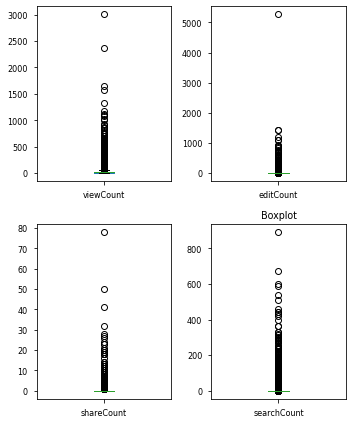

In [155]:
fig, ax = plt.subplots(2, 2)

df3['viewCount'].plot(kind = 'box', ax = ax[0, 0], figsize = (5, 6))
df3['editCount'].plot(kind = 'box', ax = ax[0, 1], figsize = (5, 6))
df3['shareCount'].plot(kind = 'box', ax = ax[1, 0], figsize = (5, 6))
df3['searchCount'].plot(kind = 'box', ax = ax[1, 1], figsize = (5, 6))

plt.title("Boxplot")
plt.tight_layout()

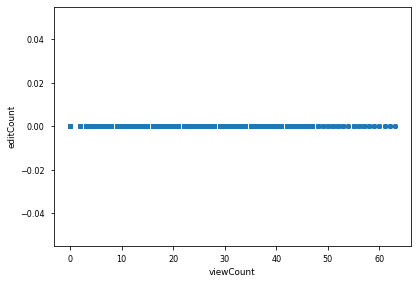

In [213]:
df3.plot(kind = 'scatter', x = 'viewCount', y = 'editCount');

In [165]:
def std_based_outlier(df):
    for i in range(0, len(df.iloc[1])):
        df = df[~(np.abs(df.iloc[:,i]-df.iloc[:,i].mean()) > (3*df.iloc[:, i].std()))]
        
        return df

In [166]:
df3_std = std_based_outlier(df3)

In [167]:
df3_std.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,164554.0000,164554.0000,164554.0000,164554.0000,164554.0000,164554.0000,164554.0000,164554.0000,164554.0000,164554.0000,164554.0000,164554.0000,164554.0000,164554.0000,164554.0000,1.6455e+05,1.6455e+05,1.6455e+05,1.6455e+05
mean,21.4714,1.2181,0.0698,0.8141,0.0019,10.7940,0.0025,0.0338,0.3111,0.1413,0.0022,9.5982,19.2423,1.8739,0.0062,2.0738e+07,5.5810e+05,2.3740e+03,2.1299e+07
std,22.7775,11.2477,0.4487,5.5982,0.1761,107.2451,0.1402,0.6077,31.9489,2.1916,0.1429,6.5742,22.4274,10.4688,0.2414,1.0450e+08,6.3807e+06,2.6611e+05,1.0569e+08
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
25%,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,4.0000,0.0000,0.0000,4.8333e+05,0.0000e+00,0.0000e+00,5.3238e+05
50%,13.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,11.0000,0.0000,0.0000,3.9393e+06,0.0000e+00,0.0000e+00,4.1084e+06
75%,28.0000,0.0000,0.0000,0.0000,0.0000,14.0000,0.0000,0.0000,0.0000,0.0000,0.0000,13.0000,26.0000,0.0000,0.0000,1.6245e+07,0.0000e+00,0.0000e+00,1.6856e+07
max,134.0000,1436.0000,41.0000,293.0000,42.0000,17755.0000,27.0000,66.0000,7907.0000,355.0000,32.0000,31.0000,134.0000,1069.0000,51.0000,1.3476e+10,1.2339e+09,8.1772e+07,1.3476e+10


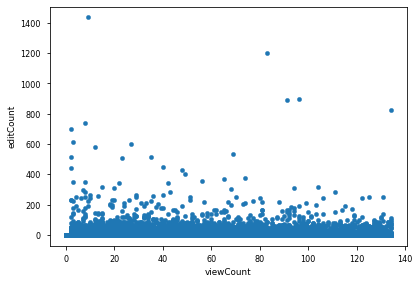

In [210]:
df3_std.plot(kind = 'scatter', x = 'viewCount', y = 'editCount');

In [183]:
## 가장 자주 쓰이는 방식
## z-score 이용: 표준점수로 변환후 +- 3std 벗어가는 경우 제고
from scipy import stats

df3_zscore = df3[(np.abs(stats.zscore(df3)) < 3).all(axis = 1)]

In [184]:
df3_zscore.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,157626.0000,157626.0000,157626.0000,157626.0000,157626.0,157626.0000,157626.0,157626.0000,157626.0000,157626.0000,157626.0,157626.0000,157626.0000,157626.0000,157626.0,1.5763e+05,1.5763e+05,157626.0000,1.5763e+05
mean,20.2101,0.5558,0.0332,0.3181,0.0,8.2425,0.0,0.0058,0.0184,0.0719,0.0,9.2138,18.0036,1.0669,0.0,1.6097e+07,2.7925e+05,1.4704,1.6376e+07
std,21.1456,3.1330,0.1793,1.9221,0.0,15.9614,0.0,0.0896,0.6730,0.3317,0.0,6.2026,20.7900,3.9947,0.0,3.5332e+07,1.5132e+06,414.2086,3.5590e+07
min,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000,0.0000e+00
25%,6.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,4.0000,4.0000,0.0000,0.0,4.5366e+05,0.0000e+00,0.0000,4.9526e+05
50%,13.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,8.0000,11.0000,0.0000,0.0,3.7871e+06,0.0000e+00,0.0000,3.8892e+06
75%,27.0000,0.0000,0.0000,0.0000,0.0,13.0000,0.0,0.0000,0.0000,0.0000,0.0,13.0000,24.0000,0.0000,0.0,1.5293e+07,0.0000e+00,0.0000,1.5719e+07
max,134.0000,60.0000,1.0000,27.0000,0.0,336.0000,0.0,2.0000,115.0000,6.0000,0.0,30.0000,128.0000,51.0000,0.0,4.1893e+08,2.2404e+07,125497.0000,4.1893e+08


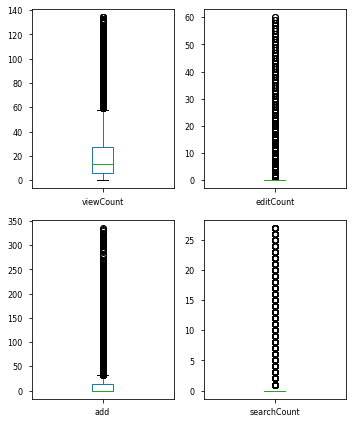

In [209]:
fig, ax = plt.subplots(2, 2)

df3_zscore['viewCount'].plot(kind = 'box', ax = ax[0, 0], figsize = (5, 6));
df3_zscore['editCount'].plot(kind = 'box', ax = ax[0, 1], figsize = (5, 6));
df3_zscore['add'].plot(kind = 'box', ax = ax[1, 0], figsize = (5, 6));
df3_zscore['searchCount'].plot(kind = 'box', ax = ax[1, 1], figsize = (5, 6));

plt.tight_layout()

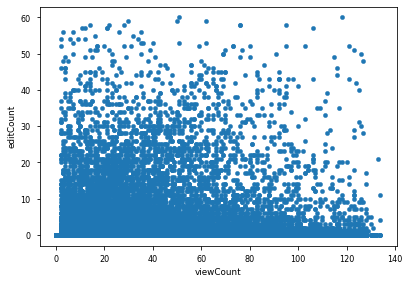

In [208]:
df3_zscore.plot(kind = 'scatter', x = 'viewCount', y = 'editCount');

#### original std vs z-score std

- 원 데이터로 처리시 매우 보수적인 결과 -> 효과가 낮아서 자주 쓰이지 않음
- 일반적으로 z-score 자주 사용, 단 정규분포에 효과적
- 정규분포가 아닐시, IQR 고려

In [187]:
#IQR

for i in range(0, len(df3.iloc[1])):
    
    q1 = df3.iloc[:, i].quantile(0.25)
    q3 = df3.iloc[:, i].quantile(0.75)
    iqr = q3-q1
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    
    df3 = df3[(df3.iloc[:, i] >= fence_low) & (df3.iloc[:, i] <= fence_high)]

In [188]:
df3.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,78773.0000,78773.0,78773.0,78773.0,78773.0,78773.0000,78773.0,78773.0,78773.0,78773.0,78773.0,78773.0000,78773.0000,78773.0,78773.0,7.8773e+04,78773.0,78773.0,7.8773e+04
mean,10.5516,0.0,0.0,0.0,0.0,2.8780,0.0,0.0,0.0,0.0,0.0,6.4107,8.3625,0.0,0.0,3.3352e+06,0.0,0.0,3.3352e+06
std,8.9457,0.0,0.0,0.0,0.0,6.3434,0.0,0.0,0.0,0.0,0.0,3.9383,8.2197,0.0,0.0,4.1316e+06,0.0,0.0,4.1316e+06
min,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0000e+00,0.0,0.0,0.0000e+00
25%,4.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,3.0000,2.0000,0.0,0.0,1.6018e+05,0.0,0.0,1.6018e+05
50%,8.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,6.0000,6.0000,0.0,0.0,1.4883e+06,0.0,0.0,1.4883e+06
75%,14.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,9.0000,12.0000,0.0,0.0,5.1816e+06,0.0,0.0,5.1816e+06
max,63.0000,0.0,0.0,0.0,0.0,30.0000,0.0,0.0,0.0,0.0,0.0,19.0000,40.0000,0.0,0.0,1.6431e+07,0.0,0.0,1.6431e+07


#### 최종검토
- IQR : 분포가 쏠려있어서 (거의 median이 0), 조금만 벗어나도 이상치로 판정
- 최종 선정은 z-score 기준으로 우선 선택

In [190]:
df3_zscore.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,157626.0000,157626.0000,157626.0000,157626.0000,157626.0,157626.0000,157626.0,157626.0000,157626.0000,157626.0000,157626.0,157626.0000,157626.0000,157626.0000,157626.0,1.5763e+05,1.5763e+05,157626.0000,1.5763e+05
mean,20.2101,0.5558,0.0332,0.3181,0.0,8.2425,0.0,0.0058,0.0184,0.0719,0.0,9.2138,18.0036,1.0669,0.0,1.6097e+07,2.7925e+05,1.4704,1.6376e+07
std,21.1456,3.1330,0.1793,1.9221,0.0,15.9614,0.0,0.0896,0.6730,0.3317,0.0,6.2026,20.7900,3.9947,0.0,3.5332e+07,1.5132e+06,414.2086,3.5590e+07
min,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000e+00,0.0000e+00,0.0000,0.0000e+00
25%,6.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,4.0000,4.0000,0.0000,0.0,4.5366e+05,0.0000e+00,0.0000,4.9526e+05
50%,13.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0,8.0000,11.0000,0.0000,0.0,3.7871e+06,0.0000e+00,0.0000,3.8892e+06
75%,27.0000,0.0000,0.0000,0.0000,0.0,13.0000,0.0,0.0000,0.0000,0.0000,0.0,13.0000,24.0000,0.0000,0.0,1.5293e+07,0.0000e+00,0.0000,1.5719e+07
max,134.0000,60.0000,1.0000,27.0000,0.0,336.0000,0.0,2.0000,115.0000,6.0000,0.0,30.0000,128.0000,51.0000,0.0,4.1893e+08,2.2404e+07,125497.0000,4.1893e+08


In [195]:
# max가 0인 컬럼은 삭제
cols_max = df3_zscore.describe().loc['max']
drop_cols = cols_max[cols_max == 0]

df3_zscore.drop(drop_cols.index, axis = 1, inplace = True)

In [196]:
df3_zscore.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,1.5763e+05,1.5763e+05,157626.0000,1.5763e+05
mean,20.2101,0.5558,0.0332,0.3181,8.2425,0.0058,0.0184,0.0719,9.2138,18.0036,1.0669,1.6097e+07,2.7925e+05,1.4704,1.6376e+07
std,21.1456,3.1330,0.1793,1.9221,15.9614,0.0896,0.6730,0.3317,6.2026,20.7900,3.9947,3.5332e+07,1.5132e+06,414.2086,3.5590e+07
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000e+00,0.0000,0.0000e+00
25%,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,4.0000,0.0000,4.5366e+05,0.0000e+00,0.0000,4.9526e+05
50%,13.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,11.0000,0.0000,3.7871e+06,0.0000e+00,0.0000,3.8892e+06
75%,27.0000,0.0000,0.0000,0.0000,13.0000,0.0000,0.0000,0.0000,13.0000,24.0000,0.0000,1.5293e+07,0.0000e+00,0.0000,1.5719e+07
max,134.0000,60.0000,1.0000,27.0000,336.0000,2.0000,115.0000,6.0000,30.0000,128.0000,51.0000,4.1893e+08,2.2404e+07,125497.0000,4.1893e+08


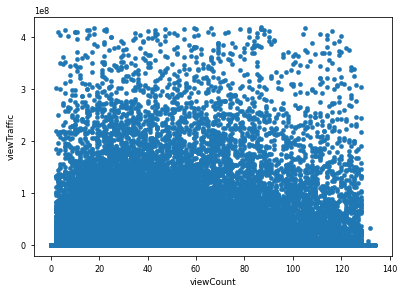

In [207]:
df3_zscore.plot(kind = 'scatter', x = 'viewCount', y = 'viewTraffic');

### 분포변환
- Transform
    - if right skewed: Log, Sqrt, cube root functions
    - if left skewed: square
- left_distribution: X^3
- mild_left: X^2
- mild_right: sqrt(X)
- right: ln(X)
- servere right: 1/X

In [199]:
df4 = df3_zscore.copy()

In [200]:
df4.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,23.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,33.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06


In [201]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157626 entries, 10100018739106 to 10100021804275
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   viewCount      157626 non-null  float64
 1   editCount      157626 non-null  float64
 2   shareCount     157626 non-null  float64
 3   searchCount    157626 non-null  float64
 4   add            157626 non-null  float64
 5   move           157626 non-null  float64
 6   rename         157626 non-null  float64
 7   adddir         157626 non-null  float64
 8   visdays        157626 non-null  float64
 9   openCount      157626 non-null  float64
 10  saveCount      157626 non-null  float64
 11  viewTraffic    157626 non-null  float64
 12  editTraffic    157626 non-null  float64
 13  exportTraffic  157626 non-null  float64
 14  traffic        157626 non-null  float64
dtypes: float64(15)
memory usage: 19.2 MB


In [202]:
# 분포를 간단히 확인 with IQR, MIN, MAX, MEAN, STD
df4.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,1.5763e+05,1.5763e+05,157626.0000,1.5763e+05
mean,20.2101,0.5558,0.0332,0.3181,8.2425,0.0058,0.0184,0.0719,9.2138,18.0036,1.0669,1.6097e+07,2.7925e+05,1.4704,1.6376e+07
std,21.1456,3.1330,0.1793,1.9221,15.9614,0.0896,0.6730,0.3317,6.2026,20.7900,3.9947,3.5332e+07,1.5132e+06,414.2086,3.5590e+07
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000e+00,0.0000,0.0000e+00
25%,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,4.0000,0.0000,4.5366e+05,0.0000e+00,0.0000,4.9526e+05
50%,13.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,11.0000,0.0000,3.7871e+06,0.0000e+00,0.0000,3.8892e+06
75%,27.0000,0.0000,0.0000,0.0000,13.0000,0.0000,0.0000,0.0000,13.0000,24.0000,0.0000,1.5293e+07,0.0000e+00,0.0000,1.5719e+07
max,134.0000,60.0000,1.0000,27.0000,336.0000,2.0000,115.0000,6.0000,30.0000,128.0000,51.0000,4.1893e+08,2.2404e+07,125497.0000,4.1893e+08


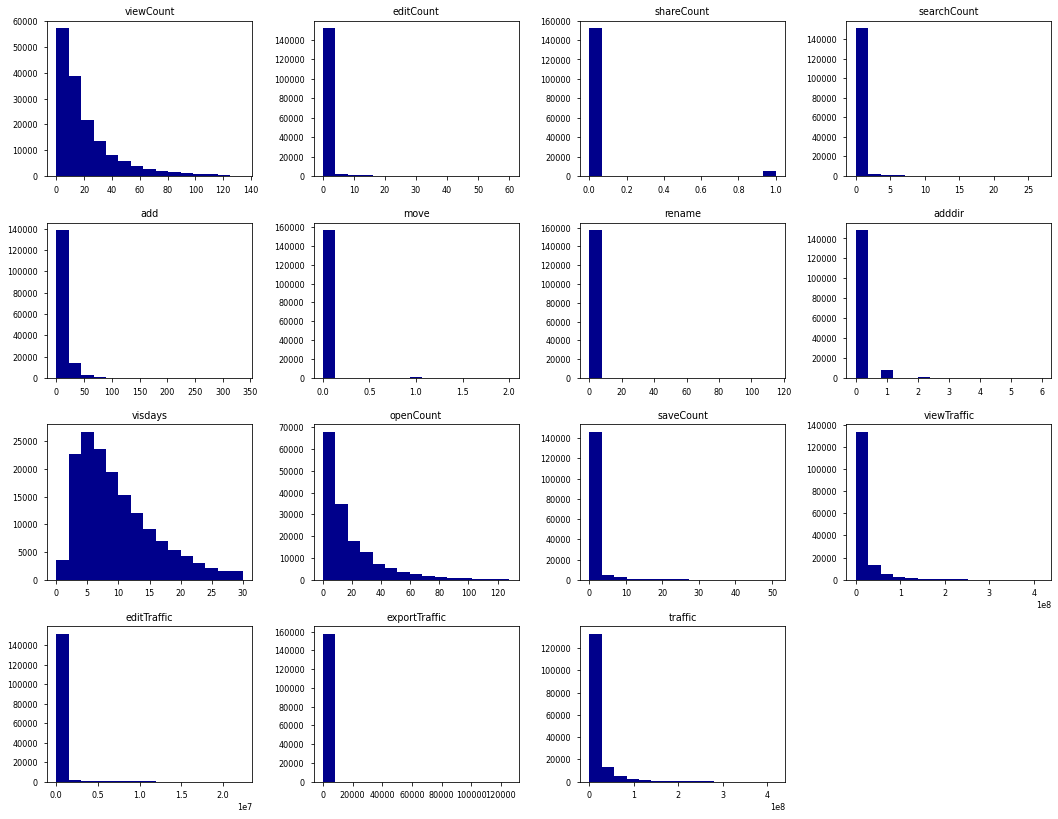

In [203]:
# Outlier 미# Outlier 미처리시 skewness 더 심해짐
df4.hist(bins = 15, color = 'darkblue', figsize = (18, 14), grid = False);

plt.grid(False)

In [204]:
# log함수 적용 (if right skewed)
df4_log = df4.apply(lambda x: np.log(x+1))

df4_log.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000
mean,2.6259,0.1424,0.0230,0.0918,1.0858,0.0037,0.0063,0.0450,2.1280,2.3523,0.2956,13.4663,2.7306,0.0001,13.5415
std,0.9455,0.5032,0.1243,0.4031,1.4775,0.0552,0.0954,0.1894,0.6635,1.1946,0.6759,5.2359,5.1201,0.0415,5.1914
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1.9459,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.6094,1.6094,0.0000,13.0251,0.0000,0.0000,13.1128
50%,2.6391,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.1972,2.4849,0.0000,15.1471,0.0000,0.0000,15.1737
75%,3.3322,0.0000,0.0000,0.0000,2.6391,0.0000,0.0000,0.0000,2.6391,3.2189,0.0000,16.5429,0.0000,0.0000,16.5704
max,4.9053,4.1109,0.6931,3.3322,5.8201,1.0986,4.7536,1.9459,3.4340,4.8598,3.9512,19.8532,16.9247,11.7400,19.8532


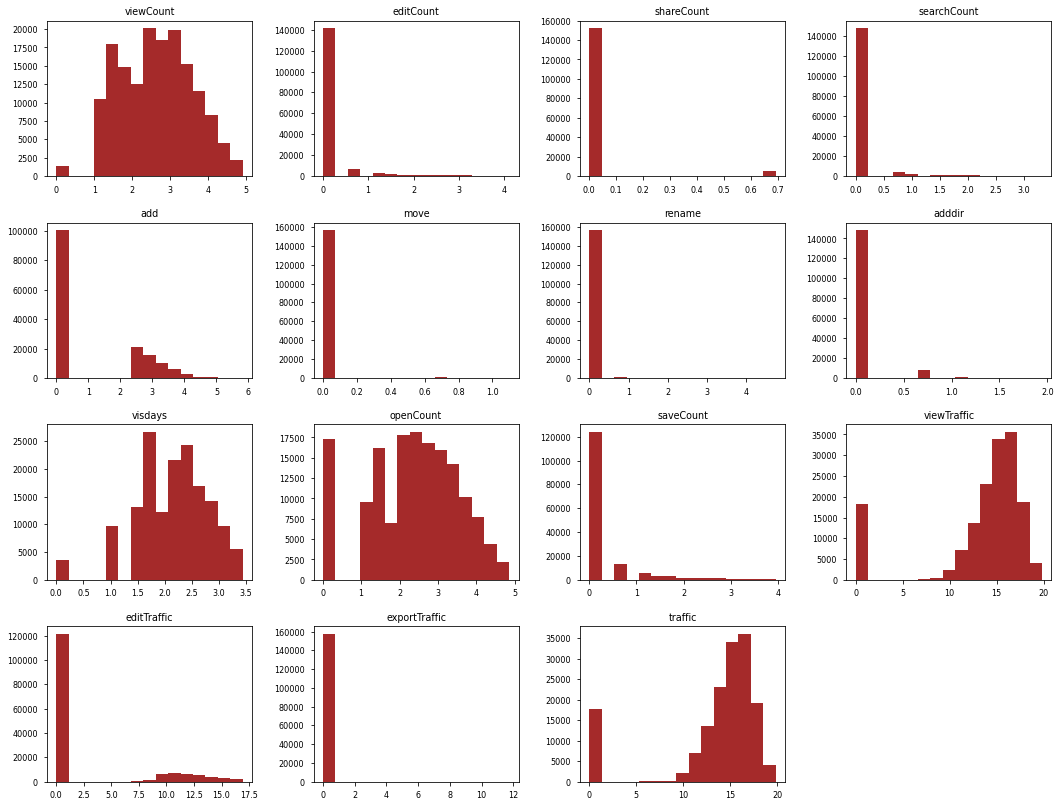

In [206]:
df4_log.hist(bins = 15, color = 'brown', figsize = (18, 14), grid = False);

In [228]:
# 다른 함수 적용
df4_cube_root = df4.apply(lambda x: x**(1. / 3))

df4_cube_root.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000
mean,2.4407,0.1517,0.0332,0.0963,0.9820,0.0050,0.0073,0.0608,1.9706,2.1864,0.3146,173.9911,15.9231,0.0006,175.9560
std,0.8591,0.4939,0.1793,0.3942,1.3467,0.0728,0.1024,0.2484,0.5344,1.0955,0.6615,130.2481,39.2389,0.1736,130.3671
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1.8171,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.5874,1.5874,0.0000,76.8384,0.0000,0.0000,79.1183
50%,2.3513,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.2240,0.0000,155.8729,0.0000,0.0000,157.2613
75%,3.0000,0.0000,0.0000,0.0000,2.3513,0.0000,0.0000,0.0000,2.3513,2.8845,0.0000,248.2151,0.0000,0.0000,250.4979
max,5.1172,3.9149,1.0000,3.0000,6.9521,1.2599,4.8629,1.8171,3.1072,5.0397,3.7084,748.2530,281.9087,50.0662,748.2530


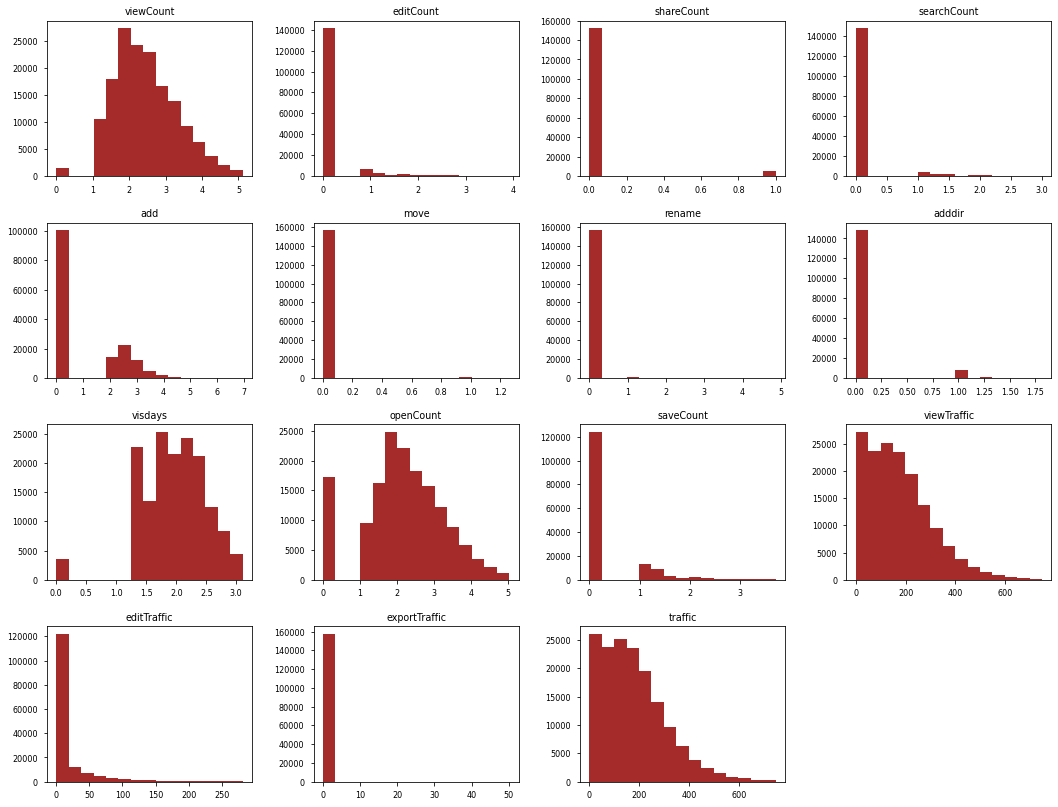

In [229]:
df4_cube_root.hist(bins = 15, color = 'brown', figsize = (18, 14), grid = False);

#### 우선 분포 변환은 Pass
- 원 분포대로 모델링 구축하고 추후 개선시 transform 진행

### 단위 표준화(Scaling)
- 모든 변수의 단위를 동일한 기준(스케일)로 통일
    - 이번 사례의 경우 traffic(byte) 변수로 인해, 필수적인 과정
- Standard Scaler (Mean: 0, std: 1)
- MinMax Scaler (default: min=0, max=1)
- Robust Scaler (x - q1 / q3 - q1)

In [236]:
df4_std_scale = df4.copy()

In [237]:
df4_std_scale.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,23.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,33.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06


In [256]:
from sklearn.preprocessing import StandardScaler

for c in df4_std_scale:
    df4_std_scale[c] = StandardScaler().fit_transform(np.array(df4_std_scale[c]).reshape(-1, 1)).round(4)

In [257]:
df4_std_scale.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,1.5763e+05,1.5763e+05,1.5763e+05,1.5763e+05,1.5763e+05,1.5763e+05,1.5763e+05,1.5763e+05,1.5763e+05,1.5763e+05,1.5763e+05,1.5763e+05,1.5763e+05,1.5763e+05,1.5763e+05
mean,1.2625e-07,7.7982e-06,3.4154e-05,5.1248e-06,2.4609e-06,3.8076e-05,1.8819e-05,-1.1001e-06,1.4883e-06,-2.7249e-05,-1.8655e-05,-1.7440e-06,3.3538e-05,4.9893e-05,3.1860e-06
std,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00
min,-9.5580e-01,-1.7740e-01,-1.8540e-01,-1.6550e-01,-5.1640e-01,-6.4600e-02,-2.7300e-02,-2.1680e-01,-1.4855e+00,-8.6600e-01,-2.6710e-01,-4.5560e-01,-1.8450e-01,-3.5000e-03,-4.6010e-01
25%,-6.7200e-01,-1.7740e-01,-1.8540e-01,-1.6550e-01,-5.1640e-01,-6.4600e-02,-2.7300e-02,-2.1680e-01,-8.4060e-01,-6.7360e-01,-2.6710e-01,-4.4270e-01,-1.8450e-01,-3.5000e-03,-4.4620e-01
50%,-3.4100e-01,-1.7740e-01,-1.8540e-01,-1.6550e-01,-5.1640e-01,-6.4600e-02,-2.7300e-02,-2.1680e-01,-1.9570e-01,-3.3690e-01,-2.6710e-01,-3.4840e-01,-1.8450e-01,-3.5000e-03,-3.5080e-01
75%,3.2110e-01,-1.7740e-01,-1.8540e-01,-1.6550e-01,2.9810e-01,-6.4600e-02,-2.7300e-02,-2.1680e-01,6.1040e-01,2.8840e-01,-2.6710e-01,-2.2800e-02,-1.8450e-01,-3.5000e-03,-1.8500e-02
max,5.3813e+00,1.8974e+01,5.3927e+00,1.3881e+01,2.0534e+01,2.2255e+01,1.7085e+02,1.7874e+01,3.3512e+00,5.2909e+00,1.2500e+01,1.1402e+01,1.4621e+01,3.0298e+02,1.1311e+01


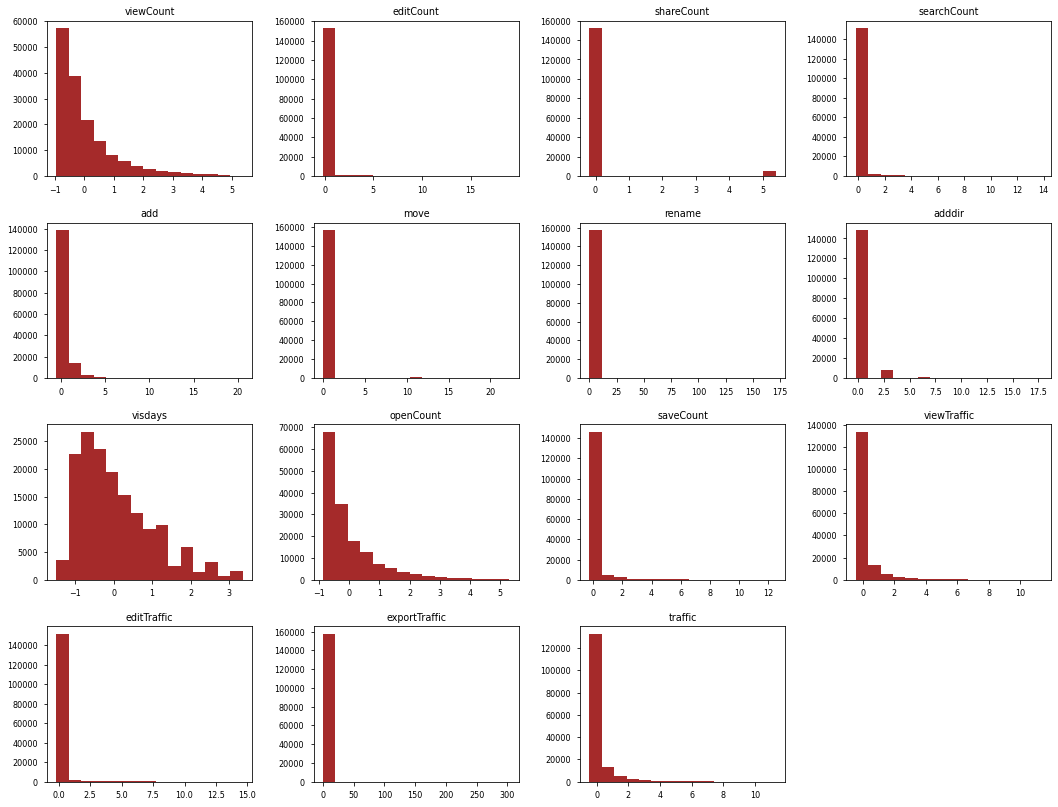

In [247]:
df4_std_scale.hist(bins = 15, color = 'brown', figsize = (18, 14), grid = False);

In [248]:
df4_minmax_scale = df4.copy()

In [249]:
from sklearn.preprocessing import MinMaxScaler

for c in df4_minmax_scale:
    df4_minmax_scale[c] = MinMaxScaler().fit_transform(np.array(df4_minmax_scale[c]).reshape(-1, 1).round(4))

In [250]:
df4_minmax_scale.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,1.5763e+05,157626.0000
mean,0.1508,0.0093,0.0332,0.0118,0.0245,0.0029,0.0002,0.0120,0.3071,0.1407,0.0209,0.0384,0.0125,1.1717e-05,0.0391
std,0.1578,0.0522,0.1793,0.0712,0.0475,0.0448,0.0059,0.0553,0.2068,0.1624,0.0783,0.0843,0.0675,3.3005e-03,0.0850
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000
25%,0.0448,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1333,0.0312,0.0000,0.0011,0.0000,0.0000e+00,0.0012
50%,0.0970,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2667,0.0859,0.0000,0.0090,0.0000,0.0000e+00,0.0093
75%,0.2015,0.0000,0.0000,0.0000,0.0387,0.0000,0.0000,0.0000,0.4333,0.1875,0.0000,0.0365,0.0000,0.0000e+00,0.0375
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000e+00,1.0000


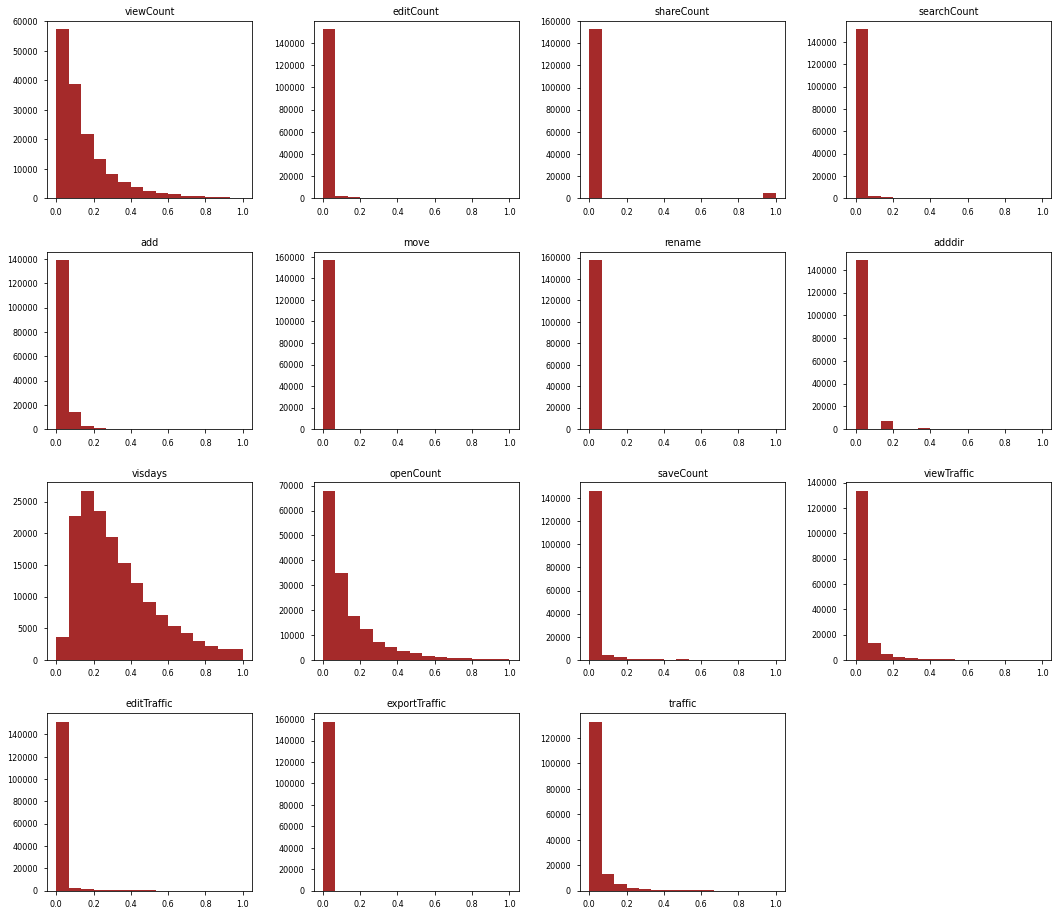

In [258]:
df4_minmax_scale.hist(bins = 15, color = 'brown', figsize = (18, 16), grid = False);

In [259]:
df4_robust_scale = df4.copy()

In [265]:
from sklearn.preprocessing import RobustScaler

for c in df4_robust_scale:
    df4_robust_scale[c] = RobustScaler().fit_transform(np.array(df4_robust_scale[c]).reshape(-1, 1).round(4))

In [266]:
df4_robust_scale.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,1.5763e+05,157626.0000,157626.0000
mean,0.3433,0.5558,0.0332,0.3181,0.6340,0.0058,0.0184,0.0719,0.1349,0.3502,1.0669,0.8295,2.7925e+05,1.4704,0.8202
std,1.0069,3.1330,0.1793,1.9221,1.2278,0.0896,0.6730,0.3317,0.6892,1.0395,3.9947,2.3810,1.5132e+06,414.2086,2.3379
min,-0.6190,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.8889,-0.5500,0.0000,-0.2552,0.0000e+00,0.0000,-0.2555
25%,-0.3333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.4444,-0.3500,0.0000,-0.2246,0.0000e+00,0.0000,-0.2229
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000e+00,0.0000,0.0000
75%,0.6667,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.5556,0.6500,0.0000,0.7754,0.0000e+00,0.0000,0.7771
max,5.7619,60.0000,1.0000,27.0000,25.8462,2.0000,115.0000,6.0000,2.4444,5.8500,51.0000,27.9766,2.2404e+07,125497.0000,27.2645


In [267]:
# dataset after remove outliers, not transform, no scale
df4.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,23.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,33.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06


In [269]:
df5 = df4.join(df2['group'])

In [270]:
df5.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic,group
iduser,,,,,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06,sdu
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,23.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07,sdu
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06,sdu
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,6.0236e+05,210114.0,0.0,8.1248e+05,sdu
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,33.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06,sdu


In [271]:
df5.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,157626.0000,1.5763e+05,1.5763e+05,157626.0000,1.5763e+05
mean,20.2101,0.5558,0.0332,0.3181,8.2425,0.0058,0.0184,0.0719,9.2138,18.0036,1.0669,1.6097e+07,2.7925e+05,1.4704,1.6376e+07
std,21.1456,3.1330,0.1793,1.9221,15.9614,0.0896,0.6730,0.3317,6.2026,20.7900,3.9947,3.5332e+07,1.5132e+06,414.2086,3.5590e+07
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000e+00,0.0000,0.0000e+00
25%,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,4.0000,0.0000,4.5366e+05,0.0000e+00,0.0000,4.9526e+05
50%,13.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,11.0000,0.0000,3.7871e+06,0.0000e+00,0.0000,3.8892e+06
75%,27.0000,0.0000,0.0000,0.0000,13.0000,0.0000,0.0000,0.0000,13.0000,24.0000,0.0000,1.5293e+07,0.0000e+00,0.0000,1.5719e+07
max,134.0000,60.0000,1.0000,27.0000,336.0000,2.0000,115.0000,6.0000,30.0000,128.0000,51.0000,4.1893e+08,2.2404e+07,125497.0000,4.1893e+08


####  [Multicollinearity](https://ko.wikipedia.org/wiki/%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1)
- 변수 삭제 1): EX) editTraffic, exportTraffic, viewTraffic, openCount
- 변수 삭제 2): 분포가 정상이 아닌 경우 (우선 유지)
- 변수 축소 3): PCA, Factor Analysis, etc

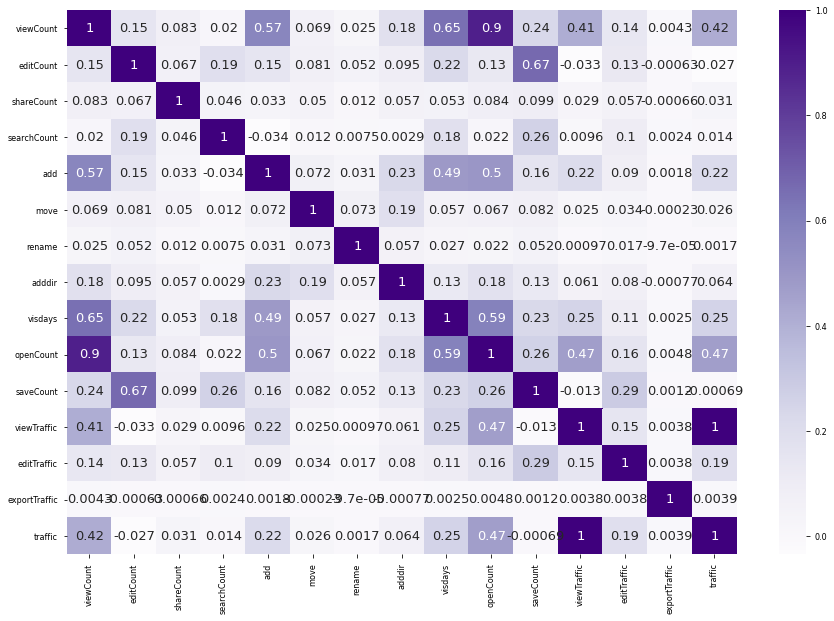

In [272]:
fig, ax = plt.subplots(figsize = (15, 10))

sns.heatmap(df5.corr(), annot = True, annot_kws = {"size": 13}, cmap = 'Purples');

In [273]:
# 상관관계가 높은 변수 제거
drop_cols = ['editTraffic', 'exportTraffic', 'viewTraffic', 'openCount']

In [274]:
df5.drop(drop_cols, axis = 1, inplace = True)

In [275]:
df5.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,saveCount,traffic,group
iduser,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,3.5048e+06,sdu
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,0.0,1.7123e+07,sdu
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.2344e+06,sdu
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,8.1248e+05,sdu
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,0.0,4.3077e+06,sdu


#### Imbalance Issues
- 결제자 여부에 대한 데이터 사례가 불충분==> 모델이 sud로 대부분 예측하는 결과
    - SDU(0)을 SDU(0)으로 예측하는 정확도(True Negative)는 높을 수 있으나, MDU(1)를 MDU(1)로 예측하는 TP는 낮을 것으로 예상낮을 것으로 예상
- how to handle imbalance    
    - https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

In [277]:
df5.group.value_counts().transform(lambda x: x/ x.sum())

sdu    0.9674
mdu    0.0326
Name: group, dtype: float64

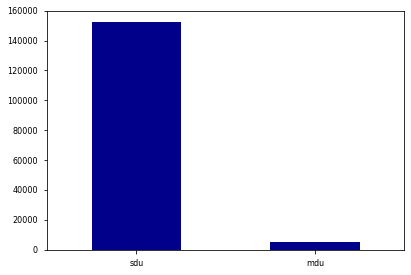

In [278]:
df5.group.value_counts().plot(kind = 'bar', color = 'darkblue', rot = 0);

In [293]:
df5['group'] = np.where(df5['group'] == 'sdu', 0, 1)

In [294]:
df5.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,saveCount,traffic,group
iduser,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,3.5048e+06,0
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,0.0,1.7123e+07,0
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.2344e+06,0
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,8.1248e+05,0
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,0.0,4.3077e+06,0


### 분류 모델 종류
- **Logistic Regression**
    - Logistic Regression fits a logistic model to data and makes predictions about the probability of an event
- **Naive Bayes**
    - Naive Bayes uses Bayes Theorem to model the conditional relationship of each attribute to the class variable
- **k-Nearest Neighbor**
    - The k-Nearest Neighbor (kNN) method makes predictions by locating similar cases to a given data instance (using a similarity function) and returning the average or majority of the most similar data instances. The kNN algorithm can be used for classification or regression
- **Tree-based model**
    - Classification and Regression Trees (CART) are constructed from a dataset by making splits that best separate the data for the classes or predictions being made. The CART algorithm can be used for classification or regression
 - **Random Forest**
    - Random Forest is a machine learning algorithm used for classification, regression, and feature selection. It's an ensemble technique, meaning it combines the output of one weaker technique in order to get a stronger result. The weaker technique in this case is a decision tree. Decision trees work by splitting the and re-splitting the data by features. If a decision tree is split along good features, it can give a decent predictive output    
 - **SVM (Support Vector Machines)**
    - Support Vector Machines (SVM) are a method that uses points in a transformed problem space that best separate classes into two groups. Classification for multiple classes is supported by a one-vs-all method. SVM also supports regression by modeling the function with a minimum amount of allowable error

### Cross Validation

- 모델 구축 후 성능 검증을 위해 전체 Dataset을 Train, Validation, Test로 나눈다.
- Test셋은 최적화된 파라미터로 구축된 최종 모델의 성능 검증을 위해 단 1회만 사용한다.
- 최적화 파라미터는 Scikit-learn에서 제공하는 grid_search를 이용하여 구한다.
- Dataset을 나눌 때 test_size 옵션으로 Train, Test의 비율을 설정할 수 있고, random_state로 seed값을 지정할 수 있다.
- 데이터 샘플이 너무 많으면, 연산 비용이 크게 증가할 수 있어 샘플링이 필요하다

```python
# 샘플링 예시 코드 / frac에는 샘플링셋의 비율을 입력, Replace는 비복원으로 지정(False)
df_sampled = df.sample(frac = 1, replace = True)
```

In [296]:
from sklearn.model_selection import train_test_split

# set ind vars and tar var
X = df5.drop('group', axis = 1)
y = df5.group

# split train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [297]:
# Scaling
scaler = MinMaxScaler()

#fit_transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [300]:
#max
print(X_train_scaled.max(axis = 0))
print(X_test_scaled.max(axis = 0))
print(' ')

#min
print(X_train_scaled.min(axis = 0))
print(X_test_scaled.min(axis = 0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [302]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(118219, 11)
(118219,)
(39407, 11)
(39407,)


### 모델 파라미터 설정
- 기본 모델: **Logistic Regression**
- 주요 파라미터(C)
    - C 값 (기본값 = 1)
    - C 값이 작으면 Penalty가 강해짐(단순 모델)
    - C 값이 크면 Penalty 약해짐(정규화 없어짐)
    - 보통 로그스케일로 지정(10배씩) = 0.01, 0.1, 1, 10
- Penalty
    - L2: Ridge, 일반적으로 사용(default)
    - L1: LASSO, 변수가 많아서 줄여야 할 때 사용, 모델의 단순화 및 해석 용이

In [306]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# set params
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv = 5)

# fit
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

#### How the grid_search module works:
```python

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# SET default
best_score = 0

#iteration
for r in ['l1', 'l2']:
    for c in [0.001, 0.01, 0.1, 1, 10, 100]:
        lm = LogisticRegression(penalty = r, C = C)
        scores = cross_val_score(lm, X_train, y_train, cv = 5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_params = {'C': C, 'penalty': r}

```

In [308]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'C': 0.001, 'penalty': 'l2'}
0.9676447948206736
LogisticRegression(C=0.001)


In [309]:
grid_search.score(X_test_scaled, y_test) # accuracy

0.9668586799299617

In [310]:
grid_search.predict(X_test_scaled)

array([0, 0, 0, ..., 0, 0, 0])

In [311]:
print(len(grid_search.predict(X_test_scaled)))
print(len(y_test))

39407
39407


### 1차 모델 평가

In [312]:
print("when grid searching: ", grid_search.best_score_)
print("at the testset: ", grid_search.score(X_test_scaled, y_test))

when grid searching:  0.9676447948206736
at the testset:  0.9668586799299617


In [313]:
# 실제 테스트셋의 label 분포
y_test.value_counts()

0    38101
1     1306
Name: group, dtype: int64

In [314]:
# 모델 예측 결과
pd.Series(grid_search.predict(X_test_scaled)).value_counts()

0    39407
dtype: int64

In [318]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(grid_search.predict(X_test_scaled), y_test))

[[38101  1306]
 [    0     0]]


In [320]:
from sklearn.metrics import classification_report

print(classification_report(grid_search.predict(X_test_scaled), y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     39407
           1       0.00      0.00      0.00         0

    accuracy                           0.97     39407
   macro avg       0.50      0.48      0.49     39407
weighted avg       1.00      0.97      0.98     39407



Text(0.5, 0, 'False Positive Rate')

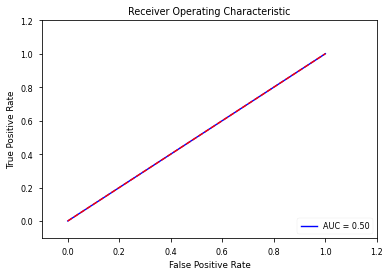

In [322]:
#ROC plot
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_search.predict(X_test_scaled))
roc_auc = auc(false_positive_rate, true_positive_rate)

fig = plt.figure(figsize = (6, 4))
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Upsampling & Downsampling for imbalanced data
1. Collect more data(if possible)
2. Resampling the Dataset
    - oversampling
        - no information loss, perform better than undersampling
        - overfitting issues (because of duplicates)
    - undersampling
        - help improve run time and storage problems
        - information loss, biased dataset
3. Generate Synthetic Samples

In [325]:
# original dataset
df5.group.value_counts()

0    152495
1      5131
Name: group, dtype: int64

In [328]:
df5.group.value_counts().transform(lambda x: x/ x.sum())

0    0.9674
1    0.0326
Name: group, dtype: float64

In [329]:
def oversampling(df):
    
    df_pay_only = df.query("group == 1")
    df_pay_only_over = pd.concat([df_pay_only, df_pay_only, df_pay_only], axis = 0)
    df_over = pd.concat([df, df_pay_only_over], axis = 0)
    
    return df_over

In [330]:
df5_over = oversampling(df5)

In [332]:
df5_over.group.value_counts().transform(lambda x: x/ x.sum())

0    0.8814
1    0.1186
Name: group, dtype: float64

In [337]:
X = df5_over.drop('group', axis = 1)
y = df5_over.group

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [338]:
print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(129764, 11)
(129764,)
(43255, 11)
(43255,)


In [339]:
# set params
param_grid = {'C': [0.001, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv = 5)

# fit
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [340]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'C': 100, 'penalty': 'l2'}
0.9211568839844844
LogisticRegression(C=100)


In [341]:
print(grid_search.score(X_test_scaled, y_test))

0.9200323662004393


In [343]:
print(confusion_matrix(grid_search.predict(X_test_scaled), y_test))

[[37250  2617]
 [  842  2546]]


In [344]:
print(classification_report(grid_search.predict(X_test_scaled), y_test))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96     39867
           1       0.49      0.75      0.60      3388

    accuracy                           0.92     43255
   macro avg       0.74      0.84      0.78     43255
weighted avg       0.94      0.92      0.93     43255



Text(0, 0.5, 'False Positive Rate')

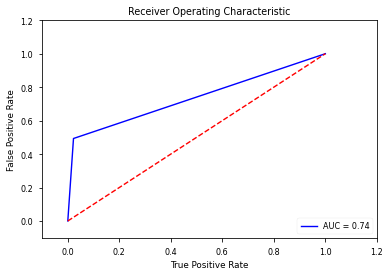

In [347]:
# ROC plot

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_search.predict(X_test_scaled))
roc_auc = auc(false_positive_rate, true_positive_rate)

fig = plt.figure(figsize = (6, 4))
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

### The model performance of the first application
- process
    - oversampling
    - dataset split
    - minmax scale
    - logistic regression, grid search, k-fold(5)
    - evaluation
    - Baseline score: **Precision: 0.5, Recall: 0.76, AUC: 0.74**
- How to improve
    - **There seems no overfitting issues**
        - how to avoid overfitting: collect more data
            - regularization
            - feature deduction
            - collect more samples
    - **Feature Engineering**
        - Other Scaling and Transformation
        - Feature selection or creation
            - Polynomial / Interactions
            - new features
        - Transformation
            - log, exp, sqrt (if not tree-based model)
            - Numeric to Categorical
    - **Model, Parameter Tuning**
        - KNN
        - NB
        - SVM
        - RF
        - NN .. any classification models


### How to Improve
- scale
- distribution transformation
- apply other models

### Change Scale to z-score & pipeline

In [349]:
df5_over.head() #after removes outliers

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,saveCount,traffic,group
iduser,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,3.5048e+06,0
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,0.0,1.7123e+07,0
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.2344e+06,0
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,8.1248e+05,0
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,0.0,4.3077e+06,0


In [350]:
X_train.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,saveCount,traffic
iduser,,,,,,,,,,,
10100012885296,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.8058e+05
10100037546685,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,24.0,0.0,1.8922e+07
10100037362378,9.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,23.0,7.0,2.0026e+05
10100036732447,24.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,11.0,0.0,4.3434e+07
10100001078477,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,6.0364e+06


In [351]:
y_train.head()

iduser
10100012885296    0
10100037546685    1
10100037362378    0
10100036732447    0
10100001078477    0
Name: group, dtype: int32

In [356]:
from sklearn.pipeline import Pipeline

def pipeline_logit(X_train, y_train):

    scaler = StandardScaler()
    logit_model = LogisticRegression()

    pipe = Pipeline([('scaler', scaler), ('model', logit_model)])

    param_grid = [{'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'model__penalty': ['l1', 'l2']}]

    grid_search = GridSearchCV(pipe, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [357]:
grid_search = pipeline_logit(X_train, y_train)

In [358]:
print("best score: ", grid_search.best_score_)
print("best params: ", grid_search.best_params_)

best score:  0.9211568839844844
best params:  {'model__C': 10, 'model__penalty': 'l2'}


In [359]:
print(classification_report(grid_search.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96     39868
           1       0.49      0.75      0.60      3387

    accuracy                           0.92     43255
   macro avg       0.74      0.84      0.78     43255
weighted avg       0.94      0.92      0.93     43255



In [360]:
fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict(X_test))
roc_auc = auc(fpr, tpr)

print(roc_auc)

0.735413043955337


### Transform Distribution

In [362]:
df5_over.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,saveCount,traffic,group
count,173019.0000,173019.0000,173019.0000,173019.0000,173019.0000,173019.0000,173019.0000,173019.0000,173019.0000,173019.0000,1.7302e+05,173019.0000
mean,20.1770,0.8279,0.0382,0.6052,8.2471,0.0076,0.0247,0.0768,9.9817,1.4176,1.6425e+07,0.1186
std,21.0466,3.9914,0.1916,2.6904,16.4303,0.1034,0.6764,0.3533,6.8199,4.8169,3.5636e+07,0.3233
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000
25%,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,0.0000,5.1046e+05,0.0000
50%,13.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,0.0000,3.8951e+06,0.0000
75%,27.0000,0.0000,0.0000,0.0000,13.0000,0.0000,0.0000,0.0000,14.0000,0.0000,1.5755e+07,0.0000
max,134.0000,60.0000,1.0000,27.0000,336.0000,2.0000,115.0000,6.0000,30.0000,51.0000,4.1893e+08,1.0000


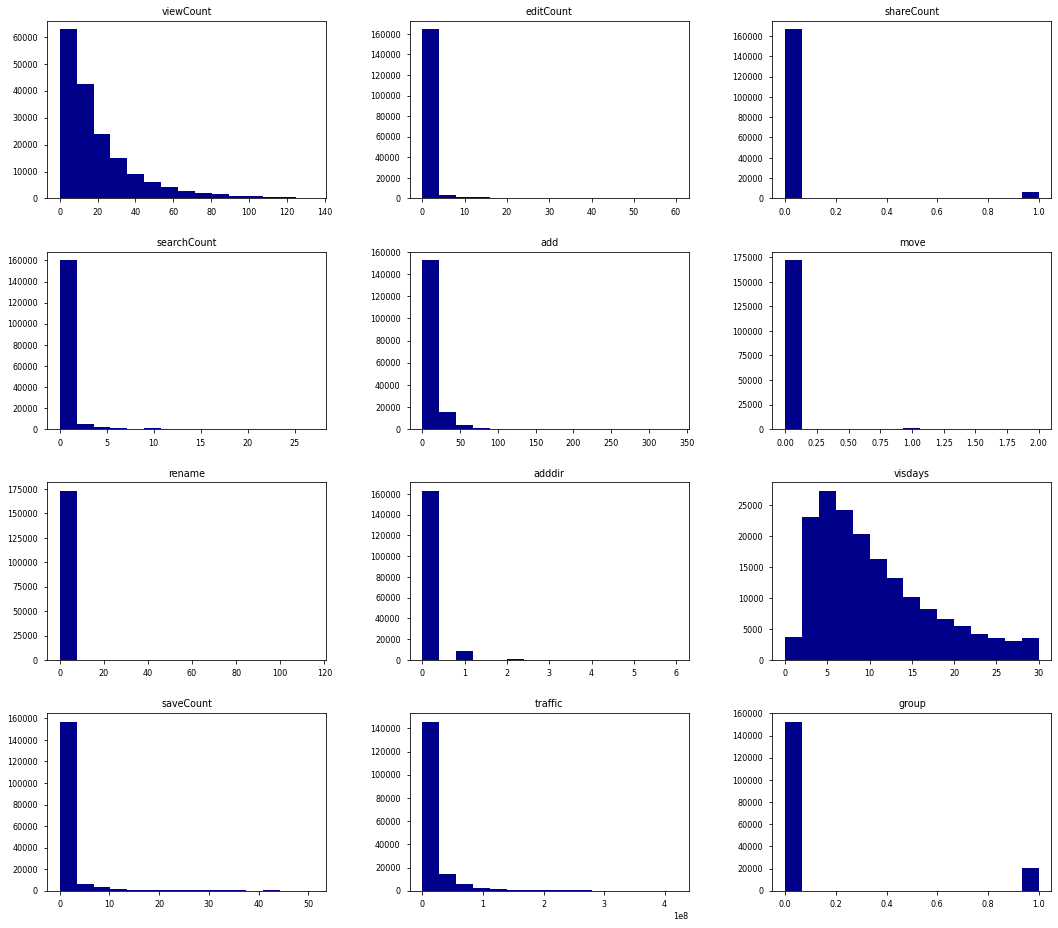

In [364]:
df5_over.hist(bins = 15, color = 'darkblue', figsize = (18, 16), grid = False);

In [365]:
df5_over_log = df5_over.loc[:, :'traffic'].apply(lambda x: np.log(x + 1)).join(df5_over['group'])

In [368]:
df5_over_log.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,saveCount,traffic,group
count,234591.0000,234591.0000,234591.0000,234591.0000,234591.0000,234591.0000,234591.0000,234591.0000,234591.0000,234591.0000,234591.0000,234591.000
mean,2.6281,0.3262,0.0356,0.3570,1.0343,0.0077,0.0169,0.0534,2.3527,0.5350,13.9215,0.350
std,0.9378,0.7923,0.1531,0.7800,1.4748,0.0810,0.1503,0.2149,0.7093,0.9253,4.6262,0.477
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000
25%,1.9459,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.9459,0.0000,13.2130,0.000
50%,2.6391,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.3979,0.0000,15.1788,0.000
75%,3.3322,0.0000,0.0000,0.0000,2.6391,0.0000,0.0000,0.0000,2.9444,0.6931,16.5824,1.000
max,4.9053,4.1109,0.6931,3.3322,5.8201,1.0986,4.7536,1.9459,3.4340,3.9512,19.8532,1.000


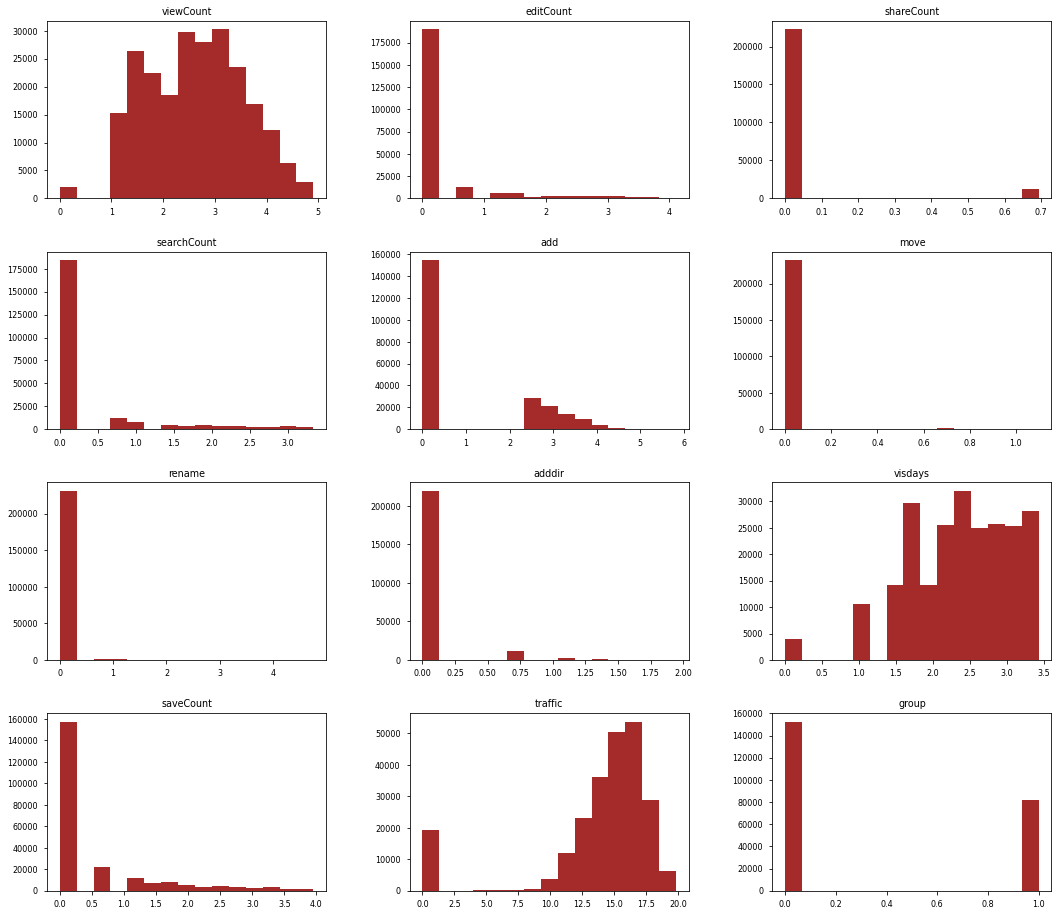

In [372]:
df5_over_log.hist(bins = 15, color = 'brown', figsize = (18, 16), grid = False);

In [375]:
X = df5_over_log.drop('group', axis = 1)
y = df5_over_log.group

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [376]:
grid_search = pipeline_logit(X_train, y_train)

In [379]:
def evaluation(grid, X_test, y_test):
    
    print(classification_report(grid.predict(X_test), y_test))
    
    print("best score: ", grid.best_score_)
    print("best params: ", grid.best_params_)
    
    fpr, tpr, thresholds = roc_curve(y_test, grid.predict(X_test))
    roc_auc = auc(fpr, tpr)
    
    return roc_auc

In [380]:
evaluation(grid_search, X_test, y_test)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     40867
           1       0.76      0.89      0.82     17781

    accuracy                           0.88     58648
   macro avg       0.86      0.88      0.87     58648
weighted avg       0.89      0.88      0.89     58648

best score:  0.8848604324352098
best params:  {'model__C': 0.1, 'model__penalty': 'l2'}


0.855791413222601

Text(0.5, 0, 'False Positive Rate')

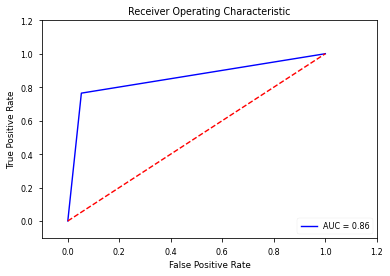

In [381]:
# ROC plot
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_search.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)

fig = plt.figure(figsize = (6, 4))
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### The current score: **Precision: 0.77, Recall: 0.88, AUC: 0.86**

### [Feature Selection](https://machinelearningmastery.com/feature-selection-machine-learning-python/)
 - Efficiency
 - [Multicollinearity](https://ko.wikipedia.org/wiki/%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1)
 - How to select
    - Univariate Selection: T-test, ANOVA, Coefficient 
    - Feature Importance (Tree-based model)
    - RFE

In [386]:
print(len(X_train.columns))
print(len(X_test.columns))

11
11


### Univariate Selection
- [F value](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)
- http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest
- 그룹내 분산이 작고, 그룹간 분산이 클 경우 F value가 커짐 (F value가 크다는 의미는 그룹간 통계적 차이가 크다는 것을 의미)

In [389]:
from sklearn.feature_selection import SelectKBest, f_classif

def pipeline_logit_kbest(X_train, y_train):
    
    select = SelectKBest(score_func = f_classif) # if regression problem, score_function = f_regression
    
    scaler = StandardScaler()
    logit_model = LogisticRegression()
    
    pipe = Pipeline([('scaler', scaler), ('feature_selection', select), ('model', logit_model)])
    
    param_grid = [{'feature_selection__k': [3, 5, 7],
                   'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                   'model__penalty': ['l1', 'l2']
                  }]
    
    grid_search = GridSearchCV(pipe, param_grid, cv = 5)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [392]:
grid_search_kbest = pipeline_logit_kbest(X_train, y_train)

In [393]:
evaluation(grid_search_kbest, X_train, y_train)

              precision    recall  f1-score   support

           0       0.94      0.84      0.88    128256
           1       0.66      0.85      0.74     47687

    accuracy                           0.84    175943
   macro avg       0.80      0.84      0.81    175943
weighted avg       0.86      0.84      0.85    175943

best score:  0.8401470962920821
best params:  {'feature_selection__k': 5, 'model__C': 10, 'model__penalty': 'l2'}


0.7978874307266287

In [399]:
mask = grid_search_kbest.best_estimator_.named_steps['feature_selection'].get_support()
feature_list = list(X_train.columns.values)

selected_features = []
for bool, features in zip(mask, feature_list):
    if bool:
        selected_features.append(features)
        
print(selected_features)

['editCount', 'searchCount', 'visdays', 'saveCount', 'traffic']


### Feature Importance of ExtraTreesClassifier

In [417]:
from sklearn.ensemble import ExtraTreesClassifier

def pipeline_tree_kbest(X_train, y_train):
    
    select = SelectKBest() # if regression problem, score_func = f_regressino
    
    # scaler = StandardScaler()
    extra_tree_model = ExtraTreesClassifier()
    
    pipe = Pipeline([('feature_selection', select), ('model', extra_tree_model)])
    
    param_grid = [{'feature_selection__k': [5, 7],
                   'model__max_depth': [4, 6], # max_depth: The maximum depth of tree
                   'model__n_estimators': [10, 50],
                   'model__min_samples_split': [50, 100]
                  }]
    
    grid_search= GridSearchCV(pipe, param_grid, cv = 3)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [418]:
grid_search_tree = pipeline_tree_kbest(X_train, y_train)

In [419]:
evaluation(grid_search_tree, X_test, y_test)

              precision    recall  f1-score   support

           0       0.93      0.83      0.88     42558
           1       0.66      0.85      0.74     16090

    accuracy                           0.84     58648
   macro avg       0.80      0.84      0.81     58648
weighted avg       0.86      0.84      0.84     58648

best score:  0.841994311173455
best params:  {'feature_selection__k': 5, 'model__max_depth': 6, 'model__min_samples_split': 100, 'model__n_estimators': 10}


0.796899185822689

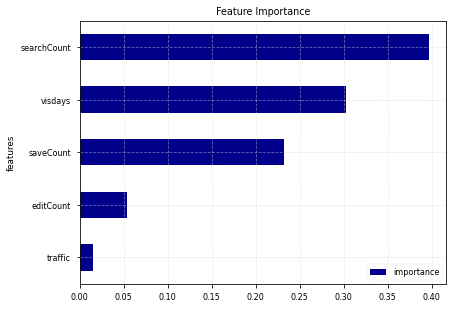

In [423]:
mask = grid_search_tree.best_estimator_.named_steps['feature_selection'].get_support()
feature_importance = grid_search_tree.best_estimator_.named_steps['model'].feature_importances_

features_list = list(X_train.columns.values)

selected_features = []
for bool, features in zip(mask, feature_list):
    if bool:
        selected_features.append(features)
        
# create a df
feature_importance_pd = pd.DataFrame(list(zip(selected_features, feature_importance)),
                                        columns = ['features', 'importance']).set_index('features').sort_values('importance')

#visual
feature_importance_pd.plot(kind = 'barh', color = 'darkblue')

plt.title("Feature Importance")
plt.grid(color = 'lightgrey', alpha = 0.5, linestyle = '--')
plt.tight_layout()

### Q) RFE (recursive featue elimination)
- Backward 방식중 하나로 모든 변수를 다 포함시키고 반복해서 학습을 하면서 중요하지 않은 변수를 하나씩 제거하는 방식
    - [API DOC](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)
- 위 방식을 이용해서 원하는 모델을 이용해 Feature Selection을 해보세요

In [431]:
# RFE (Recursive Feature Elimination)
# show ver
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

svm = LinearSVC()
rfe = RFE(svm, 1)
rfe = rfe.fit(X_train, y_train)

print(X.columns.tolist())
print(rfe.support_)
print(rfe.ranking_)

['viewCount', 'editCount', 'shareCount', 'searchCount', 'add', 'move', 'rename', 'adddir', 'visdays', 'saveCount', 'traffic']
[False False False  True False False False False False False False]
[ 6  8  5  1 10  3  4  9  2  7 11]


In [432]:
#pipeline ver.
def pipeline_lm_rfe(X_train, y_train):
    
    scale = StandardScaler()
    lm = LogisticRegression()
    select = RFE(lm, 1)
    
    pipe = Pipeline([('feature_selection', select), ('scaler', scaler), ('model', lm)])
    
    param_grid = [{'model__C': [0.01, 1],
                   'model__penalty': ['l1', 'l2']
                  }]
    
    grid_search = GridSearchCV(pipe, param_grid, cv = 2)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [433]:
grid_search_rfe = pipeline_lm_rfe(X_train, y_train)

In [434]:
evaluation(grid_search_rfe, X_test, y_test)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83     40625
           1       0.61      0.70      0.65     18023

    accuracy                           0.77     58648
   macro avg       0.73      0.75      0.74     58648
weighted avg       0.78      0.77      0.77     58648

best score:  0.7750635069989074
best params:  {'model__C': 0.01, 'model__penalty': 'l2'}


0.7325963467265877

In [437]:
print(X_train.columns.tolist())
print(grid_search_rfe.best_estimator_.named_steps['feature_selection'].support_)
print(grid_search_rfe.best_estimator_.named_steps['feature_selection'].ranking_)

['viewCount', 'editCount', 'shareCount', 'searchCount', 'add', 'move', 'rename', 'adddir', 'visdays', 'saveCount', 'traffic']
[False False False False False False False False  True False False]
[ 6  8  4  2 10  3  5  9  1  7 11]


### Q) Random Forest, SVM이나 NB, Neural Network 등 다른 모델도 파이프라인에 사용해보세요
```python
# KNN
from sklearn.neighbors import KNeighborsClassifier

params_grid = [{'n_neighbors': [3, 5, 10], # default: 5
                'metrics': ['euclidean', 'manhattan']
                # 'cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan'
               }]
# SVC
from sklearn.svm import SVC

params_grid = [{'C': [1, 10], # Penalty parameter C of the error term
                'gamma': [1, 10], # Higher the value of gamma, will try to exact fit
                'kernal': ['linear', 'rbf']
               }]

# neural_network
from sklearn.neural_network import MLPClassifier

params_grid = [{'solver': [1, 10],
                'hidden_layer_sizes': [(5, 2), (3, 3)]
               }]
```


In [442]:
from sklearn.neural_network import MLPClassifier

def pipeline_nn(X_train, y_train):
    
    select = SelectKBest(score_func = f_classif) # if regression problem, score_func = f_regression
    scaler = MinMaxScaler()
    mlp = MLPClassifier()
    
    pipe = Pipeline([('scaler', scaler), ('feature_selection', select), ('model', mlp)])
    
    param_grid = [{'feature_selection__k': [5, 7],
                   'model__solver': ['sgd', 'adam'],
                   'model__hidden_layer_sizes': [(5, 2), (3, 3)]
                  }]
    
    grid_search = GridSearchCV(pipe, param_grid, cv = 2)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [443]:
grid_search_nn = pipeline_nn(X_train, y_train)

In [444]:
evaluation(grid_search_nn, X_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     39025
           1       0.77      0.81      0.79     19623

    accuracy                           0.86     58648
   macro avg       0.84      0.85      0.84     58648
weighted avg       0.86      0.86      0.86     58648

best score:  0.8620007641901546
best params:  {'feature_selection__k': 7, 'model__hidden_layer_sizes': (3, 3), 'model__solver': 'adam'}


0.8391803402282477